In [29]:
#importing the libraries:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
#pip install keras
#import keras
#from keras.models import Sequential
#from keras.layers import Dense

#from keras.layers import Conv2D, MaxPooling2D
#from keras.layers import Activation, Dropout, Flatten, Dense

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC

from scipy import stats
from scipy.stats import norm

In [4]:
#creating the base path
path = "/Users/rachana/Documents/projects/udacity_project/data/"

In [5]:
#getting the dataset- ''''there are three seperate csv files''''


listing = pd.read_csv(path + 'listings.csv')
calender = pd.read_csv(path + 'calendar.csv')
reviews = pd.read_csv(path+ 'reviews.csv')

In [158]:
print ("listing has {} no. of rows and {} no. of columns".format(listing.shape[0], listing.shape[1] ))
print ("calender has {} no. of rows and {} no. of columns".format(calender.shape[0], calender.shape[1] ))
print ("reviews has {} no. of rows and {} no. of columns".format(reviews.shape[0], reviews.shape[1] ))

listing has 3818 no. of rows and 93 no. of columns
calender has 1393570 no. of rows and 4 no. of columns
reviews has 84849 no. of rows and 6 no. of columns


## LISTING DATA:
1. MISSING VALUES
2. PRICE BREAKUP
3. price distrbution wrt to property type
4. most popular neighbourhood in terms of price


In [45]:
# now lets look at the listing...
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,150.0,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing w

## MISSING VALUES IN LISTING DATA

In [15]:
# lets take a look at the null values in the listing
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [54]:
# A LOOK AT THE COLUMNS WITHOUT MISSING DATA- 47. columns have no null data
no_nulls = set(listing.columns[listing.isnull().sum()==0])
len(no_nulls)

47

In [56]:
#columns with most missing values
most_missing_cols = set(listing.columns[listing.isnull().sum() > 0.75])
len(most_missing_cols)

45

<Figure size 2880x1080 with 0 Axes>

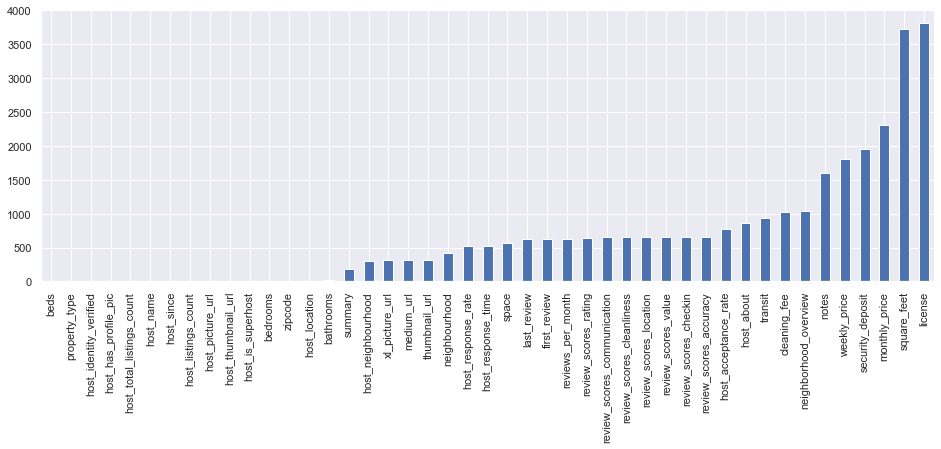

<Figure size 2880x1080 with 0 Axes>

In [58]:
#a look at columns with most missing values
missing = listing.isnull().sum()
missing = missing[missing > 0.75]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.figure(figsize=(40,15))

In [21]:
## 'Price' is the target variable, it has no null values... 
## but it has a dolar sign and therefor it is representes as string object. 
listing['price'] = listing['price'].str.replace("[$, ]", "").astype("float")

In [23]:
listing['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

## Price trends
lets take a look how the price of renting varies===
1. in terms of distribution
2. how the locality affects the price?
3. how property_type effects the price?

<Figure size 2160x720 with 0 Axes>

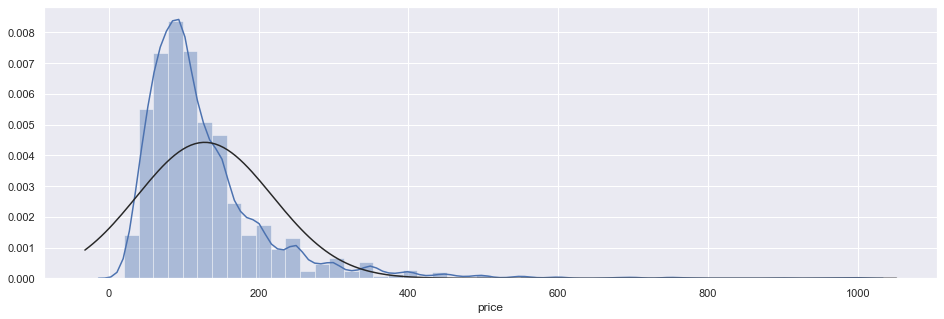

<Figure size 2160x720 with 0 Axes>

In [109]:
# Price distribution in listing data
sns.distplot(listing['price'], fit = norm)
plt.figure(figsize=(30,10))

In [114]:
listing['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

# which neighbourhood has most  no. of listings?

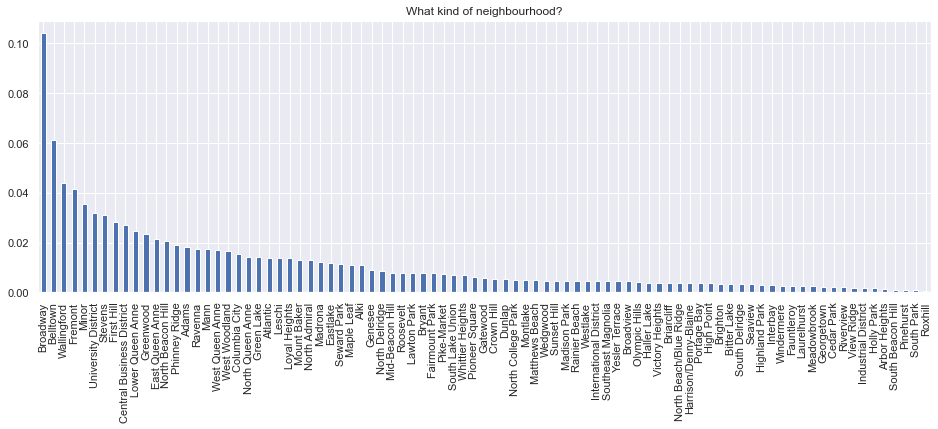

In [67]:
neighbourhood = listing.neighbourhood_cleansed.value_counts()
(neighbourhood/len(listing.neighbourhood_cleansed)).plot(kind="bar");
plt.title("Neighbourhood with most no. of listing")

## what are the most expensive neighbourhood in terms of price?

In [177]:
price_neighbourhood = listing.groupby(['neighbourhood_cleansed']).mean()['price'].sort_values(ascending = False)


Text(0.5, 1.0, 'Most expensive neighbourhood')

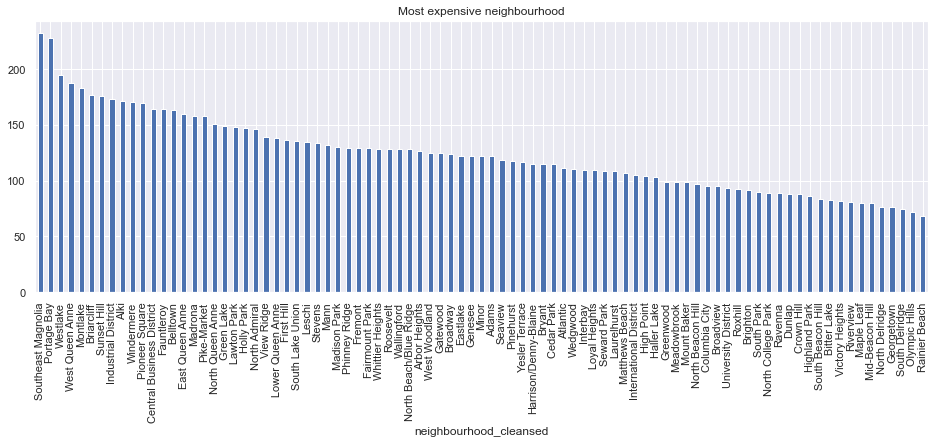

In [179]:
price_neighbourhood.plot(kind = 'bar')
plt.title('Most expensive neighbourhood')

# what are the most expensive property type in the listing?

In [110]:
listing.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

In [119]:
price_property_type = listing.groupby(['property_type']).mean()['price'].sort_values(ascending = False)


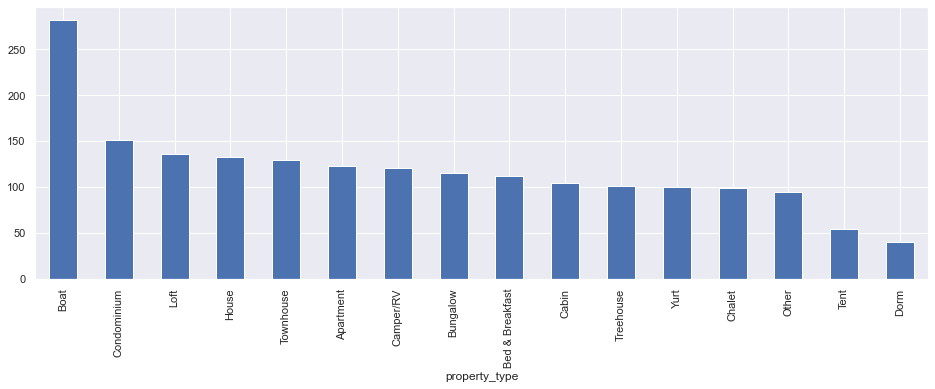

In [120]:
price_property_type.plot(kind = 'bar')

# price and no of bedroom relationship?

In [128]:
#no of bedrooms --- range from 1-7, also there are 0 bedrooms. which in some cases means an apartment.
listing.bedrooms.value_counts()

1.0    2417
2.0     640
0.0     372
3.0     283
4.0      69
5.0      24
6.0       6
7.0       1
Name: bedrooms, dtype: int64

In [151]:
#price per bedroom, due to 0 bedrooms, we get apartment costing as 0
listing['price_per_bedroom'] = listing['price']/listing['bedrooms']

In [152]:
price_per_bedroom

[0        85.000000
 1       150.000000
 2       195.000000
 3              inf
 4       150.000000
            ...    
 3813    119.666667
 3814     79.000000
 3815     93.000000
 3816           inf
 3817     43.500000
 Length: 3818, dtype: float64]

In [186]:
## locality with highest price per bedrooms:
price_bedroom_neighbourhood = listing.groupby(['neighbourhood_cleansed']).mean()['price_per_bedroom'].sort_values(ascending = False)


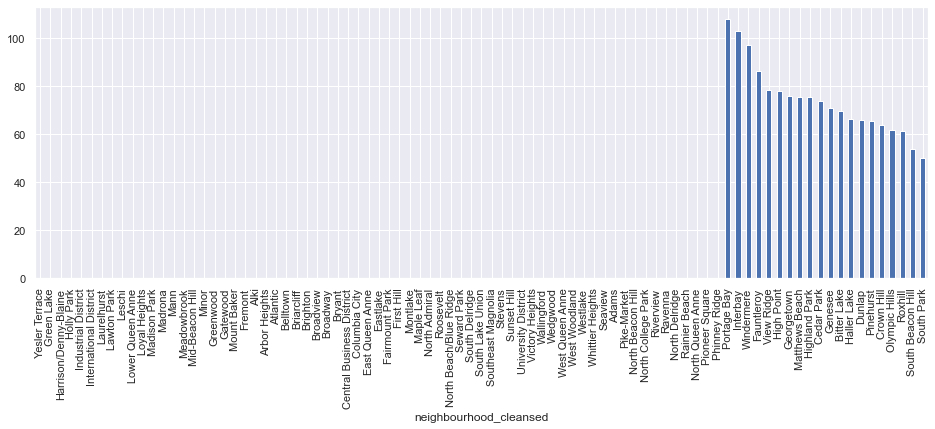

In [187]:
price_bedroom_neighbourhood.plot(kind = 'bar')

## who are the top 10 host in terms of listing posted on airbnb ?

In [209]:
n=10
listing_host = listing.groupby(['host_name']).sum()['id'].sort_values(ascending = False).head(n)

In [210]:
listing_host

host_name
Daniela               303718651
Andrew                270926919
Michael               249674113
Eric                  231893335
Jordan                192516969
Sea To Sky Rentals    180864207
Melissa               176804991
Jennifer              174408157
Dario                 173090830
Sarah                 155791398
Name: id, dtype: int64

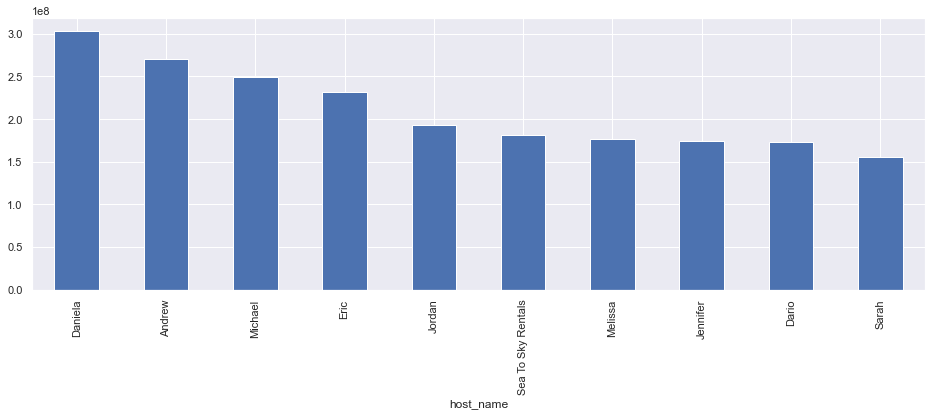

In [211]:
listing_host.plot(kind = 'bar')

## what are the localities of top ten hosts?

In [213]:
n=10
listing_host_locality = listing.groupby(['host_name', 'neighbourhood_cleansed']).sum()['id'].sort_values(ascending = False).head(n)

In [214]:
listing_host_locality

host_name           neighbourhood_cleansed   
Eric                Broadway                     164534632
Jordan              Belltown                     111245347
Melissa             University District          108059127
Daniela             Belltown                      98985508
Dario               University District           91022060
Sea To Sky Rentals  Belltown                      89212133
Daniela             Central Business District     80948838
Ren                 University District           78969406
Mack & Sophia       Belltown                      75315788
Andrew              Wallingford                   70357957
Name: id, dtype: int64

## Review DF- get some insught
--- top reviwers
--- most reviwed listing
-- reviews for top ten listing

In [107]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


# lets take a look at our top reviewers?

In [230]:
top_reviewers = reviews.groupby(['reviewer_name']).sum()['listing_id'].head(n)
n =10

In [231]:
top_reviewers

reviewer_name
'Brielle            254340
(Leo) Dennis       4417792
(email hidden)    72096267
5012scf            1593991
A                  3917617
A M                9138923
A'Ala              7967844
A-Rod                53867
A. Anastasia        934123
A. Heather         1005823
Name: listing_id, dtype: int64

In [157]:
calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [219]:
listing.head(2)

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_per_bedroom
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,85.0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,150.0,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,150.0


## Merge the dataframes

In [216]:
# inorder to perform merge we will have to rename id to listing_id in listing df:
listing.rename(columns={'id':'listing_id'}, inplace=True)

In [218]:
listing.head(2)

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_per_bedroom
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,85.0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,150.0,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,150.0


In [220]:
# merge reviews and listing df:
rev_listing = pd.merge(reviews, listing, on='listing_id')


In [221]:
rev_listing.shape

(84849, 98)

In [222]:
rev_listing.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_per_bedroom
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,https://www.airbnb.com/rooms/7202016,20160104002432,2016-01-04,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,"Mid century condo, super airy and spacious. H...",Cute mid century condo within walking distance...,none,"Neighborhood has everything. Coffee, restaura...","You will be staying in the city, close to ever...",Free on street parking (you are close to all m...,https://a2.muscache.com/ac/pictures/91327498/b...,https://a2.muscache.com/im/pictures/91327498/b...,https://a2.muscache.com/ac/pictures/91327498/b...,https://a2.muscache.com/ac/pictures/91327498/b...,37686877,https://www.airbnb.com/users/show/37686877,Kelly,2015-07-06,"Seattle, Washington, United States",Been all over the world. Love the comfort of h...,within an hour,100%,100%,f,https://a0.muscache.com/ac/users/37686877/prof...,https://a0.muscache.com/ac/users/37686877/prof...,Lower Queen Anne,1.0,1.0,"['email', 'phone', 'linkedin', 'reviews', 'kba']",t,t,"3rd Avenue West, Seattle, WA 98119, United States",Lower Queen Anne,Lower Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.62621,-122.360147,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,Heating,...",NaN,75.0,NaN,NaN,NaN,$15.00,1,$0.00,2,15,today,t,25,55,85,360,2016-01-04,16,2015-07-19,2016-01-02,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,t,flexible,f,f,1,2.82,75.0
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,https://www.airbnb.com/rooms/7202016,20160104002432,2016-01-04,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,"Mid century condo, super airy and spacious. H...",Cute mid century condo within walking distance...,none,"Neighborhood has everything. Coffee, restaura...","You will be staying in the city, close to ever...",Free on street parking (you are close to all m...,https://a2.muscache.com/ac/pictures/91327498/b...,https://a2.muscache.com/im/pictures/91327498/b...,https://a2.muscache.com/ac/pictures/91327498/b...,https://a2.muscache.com/ac/pictures/91327498/b...,37686877,https://www.airbnb.com/users/show/37686877,Kelly,2015-07-06,"Seattle, Washington, United States",Been all over the world. Love the comfort of h...,within an hour,100%,100%,f,https://a0.muscache.com/ac/users/37686877/prof...,https://a0.muscache.com/ac/users/37686877/prof...,Lower Queen Anne,1.0,1.0,"['email', 'phone

In [223]:
#merge the resultant df to calender:
final_listing = pd.merge(rev_listing, calender, on='listing_id')

In [224]:
final_listing.shape

(30969885, 101)

In [225]:
final_listing.head(3)

,listing_id,id,date_x,reviewer_id,reviewer_name,comments,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price_x,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_per_bedroom,date_y,available,price_y
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,https://www.airbnb.com/rooms/7202016,20160104002432,2016-01-04,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,"Mid century condo, super airy and spacious. H...",Cute mid century condo within walking distance...,none,"Neighborhood has everything. Coffee, restaura...","You will be staying in the city, close to ever...",Free on street parking (you are close to all m...,https://a2.muscache.com/ac/pictures/91327498/b...,https://a2.muscache.com/im/pictures/91327498/b...,https://a2.muscache.com/ac/pictures/91327498/b...,https://a2.muscache.com/ac/pictures/91327498/b...,37686877,https://www.airbnb.com/users/show/37686877,Kelly,2015-07-06,"Seattle, Washington, United States",Been all over the world. Love the comfort of h...,within an hour,100%,100%,f,https://a0.muscache.com/ac/users/37686877/prof...,https://a0.muscache.com/ac/users/37686877/prof...,Lower Queen Anne,1.0,1.0,"['email', 'phone', 'linkedin', 'reviews', 'kba']",t,t,"3rd Avenue West, Seattle, WA 98119, United States",Lower Queen Anne,Lower Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.62621,-122.360147,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,Heating,...",NaN,75.0,NaN,NaN,NaN,$15.00,1,$0.00,2,15,today,t,25,55,85,360,2016-01-04,16,2015-07-19,2016-01-02,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,t,flexible,f,f,1,2.82,75.0,2016-01-04,t,$65.00
1,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,https://www.airbnb.com/rooms/7202016,20160104002432,2016-01-04,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,"Mid century condo, super airy and spacious. H...",Cute mid century condo within walking distance...,none,"Neighborhood has everything. Coffee, restaura...","You will be staying in the city, close to ever...",Free on street parking (you are close to all m...,https://a2.muscache.com/ac/pictures/91327498/b...,https://a2.muscache.com/im/pictures/91327498/b...,https://a2.muscache.com/ac/pictures/91327498/b...,https://a2.muscache.com/ac/pictures/91327498/b...,37686877,https://www.airbnb.com/users/show/37686877,Kelly,2015-07-06,"Seattle, Washington, United States",Been all over the world. Love the comfort of h...,within an hour,100%,100%,f,https://a0.muscache.com/ac/users/37686877/prof...,https://a0.muscache.com/ac/users/37686877/